****
# **ECSE415 A1**

Student Name: Zhiheng Zhou

Student ID: 260955157
****

# **1. Image Acquisition**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
image shape: (4032, 3024, 3)
image shape: (4032, 3024, 3)


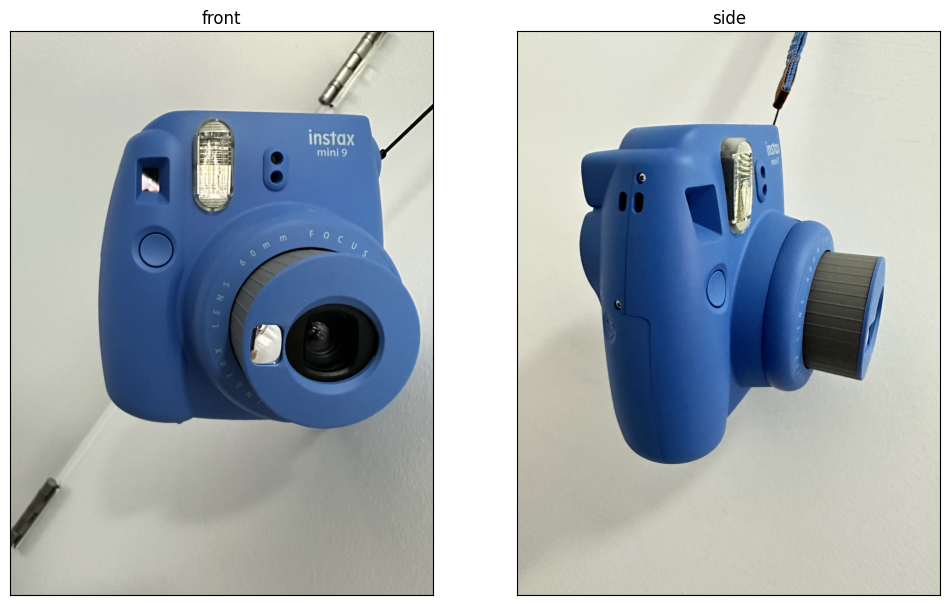

In [1]:
path='/content/drive/MyDrive/ECSE415/Colab Notebooks/A1/'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Read in the image
imageFront = cv2.imread(path + 'image415.jpg')
imageSide = cv2.imread(path + 'image2_415.jpg')

#Concert from RGB value to GBR value
imageFrontFixed = cv2.cvtColor(imageFront, cv2.COLOR_BGR2RGB)
imageSideFixed = cv2.cvtColor(imageSide, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,16))
plt.subplot(121), plt.imshow(imageFrontFixed)
plt.title("front"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageSideFixed)
plt.title("side"), plt.xticks([]), plt.yticks([])

print("image shape:", np.shape(imageFrontFixed))
print("image shape:", np.shape(imageSideFixed))
plt.show()

# **2. Convert to Grayscale**

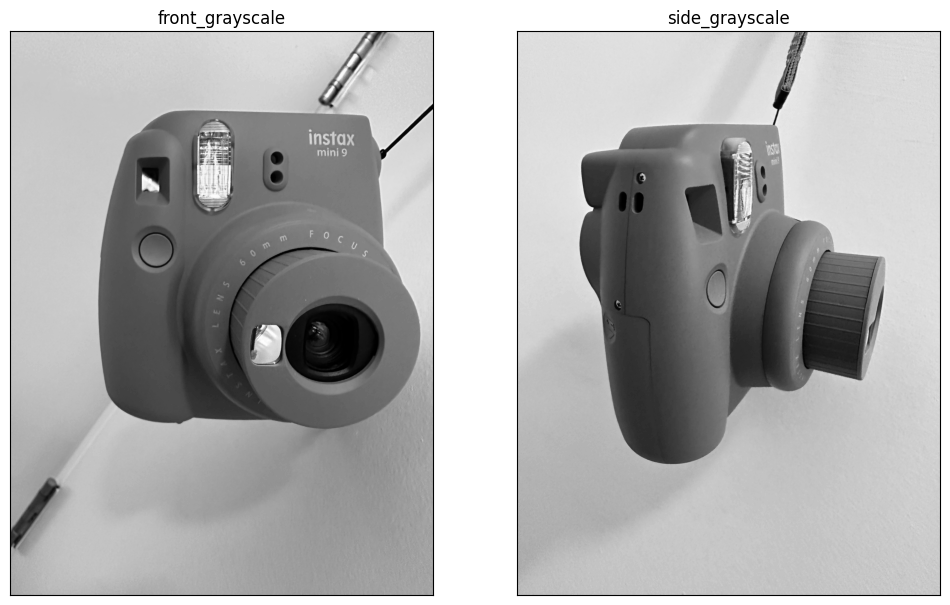

In [2]:
 # Grayscale average
gray = [0.333, 0.333, 0.333]

# Getting grayscale image using grascale average
imageFrontFixed = np.dot(imageFrontFixed, gray)
imageSideFixed = np.dot(imageSideFixed, gray)

plt.figure(figsize=(12,16))

plt.subplot(121), plt.imshow(imageFrontFixed, cmap='gray')
plt.title("front_grayscale"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageSideFixed, cmap='gray')
plt.title("side_grayscale"), plt.xticks([]), plt.yticks([])

plt.show()

****
# **3.1. Smooth the Images Using Gaussian Smoothing (11×11)**

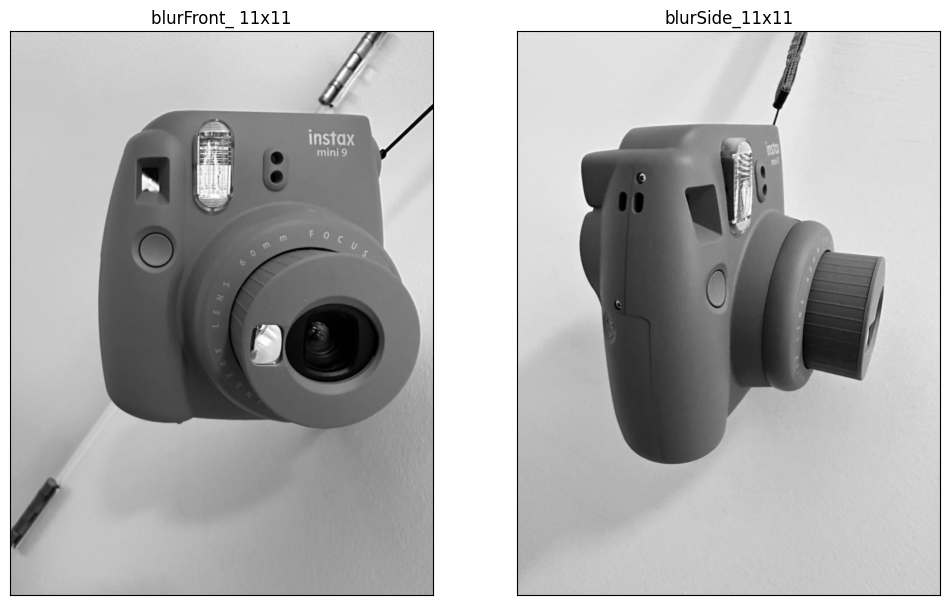

In [3]:
# Smoothing grayscale images using 11x11 Gaussian kernel
blurFront = cv2.GaussianBlur(imageFrontFixed, (11, 11), 2) # 6sigma - 1 = kernel width (6*2 - 1 = 11)
blurSide = cv2.GaussianBlur(imageSideFixed, (11, 11), 2)

plt.figure(figsize=(12,16))

# Plotting smoothed grayscale images (11x11 Gaussian kernel)
plt.subplot(121), plt.imshow(blurFront, cmap='gray')
plt.title("blurFront_ 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blurSide, cmap='gray')
plt.title("blurSide_11x11"), plt.xticks([]), plt.yticks([])

plt.show()

# **3.2. Smooth the Images Using Gaussian Smoothing (5×5)**

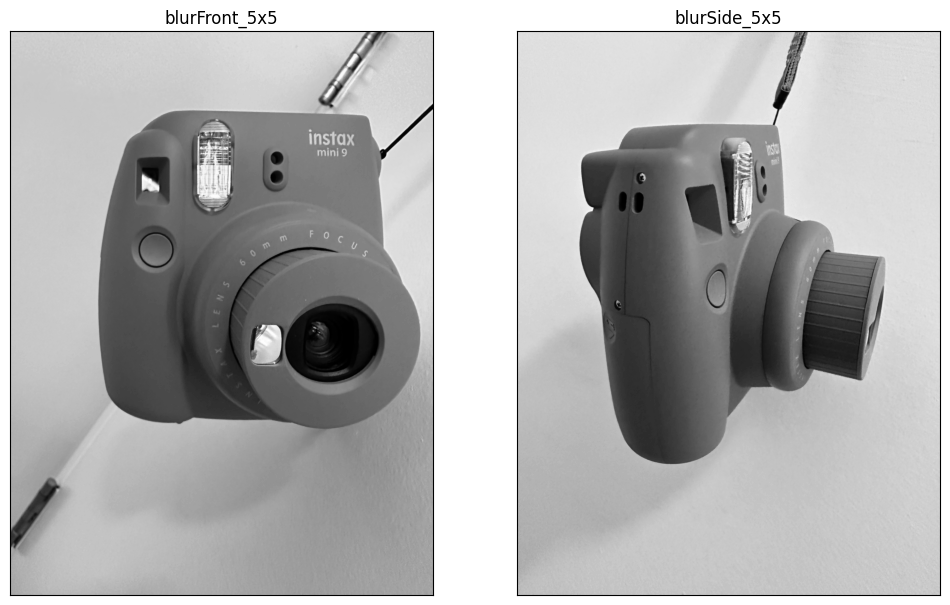

In [4]:
# Smoothing grayscale images using 5x5 Gaussian kernel
blurFront_5By5 = cv2.GaussianBlur(imageFrontFixed, (5, 5), 1) # 6sigma - 1 = kernel width (6*1 - 1 = 5)
blurSide_5By5 = cv2.GaussianBlur(imageSideFixed, (5, 5), 1)

plt.figure(figsize=(12,16))

# Plotting smoothed grayscale images (5x5 Gaussian kernel)
plt.subplot(121), plt.imshow(blurFront_5By5, cmap='gray')
plt.title("blurFront_5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blurSide_5By5, cmap='gray')
plt.title("blurSide_5x5"), plt.xticks([]), plt.yticks([])
plt.show()

****
# **4.1. Compute Image Gradient (11×11)**

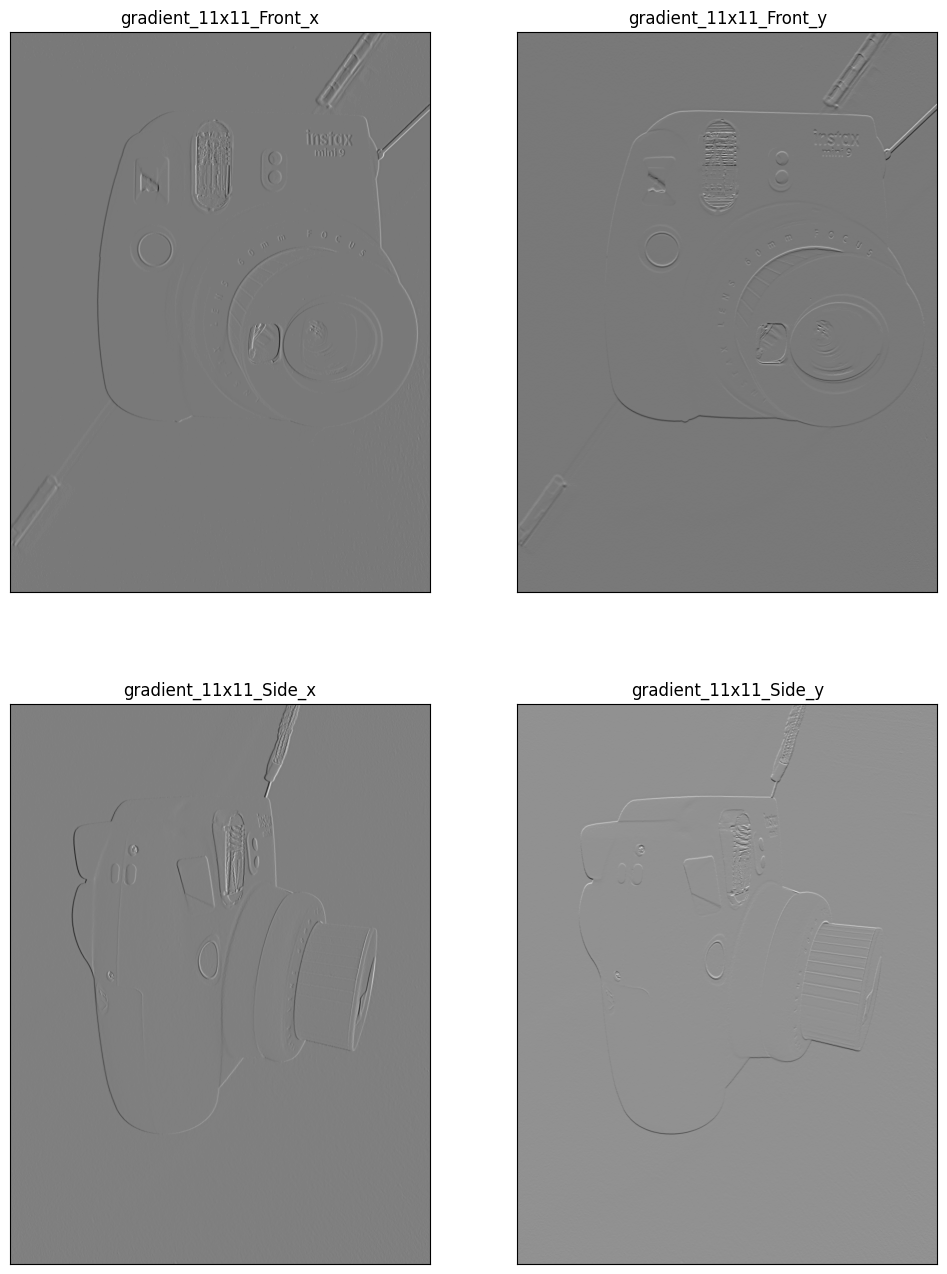

In [5]:
# Sobel filter in x and y
kernel_sobel_x = np.array([[ -1, 0, 1],[ -2, 0, 2],[ -1, 0, 1]])
kernel_sobel_y = np.array([[ 1, 2, 1],[ 0, 0, 0],[ -1, -2, -1]])

# Computing the image gradient in x-direction and y-direction using Sobel derivative filters.
imageFilteredFront_x = cv2.filter2D(blurFront, -1, kernel_sobel_x)
imageFilteredFront_y = cv2.filter2D(blurFront, -1, kernel_sobel_y)
imageFilteredSide_x = cv2.filter2D(blurSide, -1, kernel_sobel_x)
imageFilteredSide_y = cv2.filter2D(blurSide, -1, kernel_sobel_y)

plt.figure(figsize=(12,16))

plt.subplot(221), plt.imshow(imageFilteredFront_x, cmap='gray')
plt.title("gradient_11x11_Front_x"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imageFilteredFront_y, cmap='gray')
plt.title("gradient_11x11_Front_y"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imageFilteredSide_x, cmap='gray')
plt.title("gradient_11x11_Side_x"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imageFilteredSide_y, cmap='gray')
plt.title("gradient_11x11_Side_y"), plt.xticks([]), plt.yticks([])
plt.show()

# **4.2. Compute Image Gradient (5×5)**

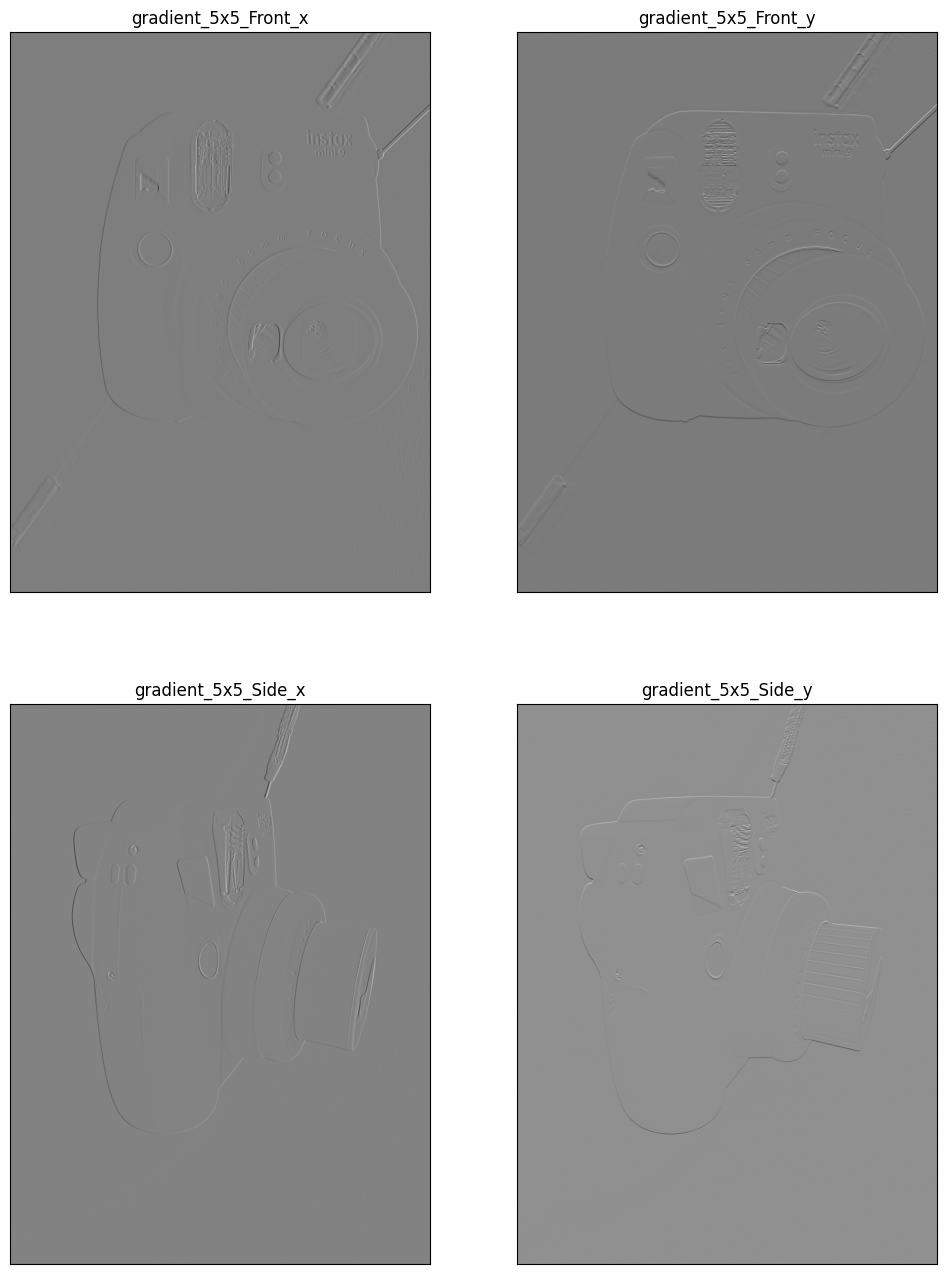

In [6]:
# Sobel filter in x and y
kernel_sobel_x = np.array([[ -1, 0, 1],[ -2, 0, 2],[ -1, 0, 1]])
kernel_sobel_y = np.array([[ 1, 2, 1],[ 0, 0, 0],[ -1, -2, -1]])

# Computing the image gradient in x-direction and y-direction using Sobel derivative filters.
imageFilteredFront_x_5By5  = cv2.filter2D(blurFront_5By5 , -1, kernel_sobel_x)
imageFilteredFront_y_5By5  = cv2.filter2D(blurFront_5By5 , -1, kernel_sobel_y)
imageFilteredSide_x_5By5  = cv2.filter2D(blurSide_5By5 , -1, kernel_sobel_x)
imageFilteredSide_y_5By5  = cv2.filter2D(blurSide_5By5 , -1, kernel_sobel_y)

plt.figure(figsize=(12,16))
plt.subplot(221), plt.imshow(imageFilteredFront_x_5By5 , cmap='gray')
plt.title("gradient_5x5_Front_x"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imageFilteredFront_y_5By5 , cmap='gray')
plt.title("gradient_5x5_Front_y"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imageFilteredSide_x_5By5 , cmap='gray')
plt.title("gradient_5x5_Side_x"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imageFilteredSide_y_5By5 , cmap='gray')
plt.title("gradient_5x5_Side_y"), plt.xticks([]), plt.yticks([])
plt.show()

****
# **5.1. Compute the Edge Magnitude and Orientation (11×11)**

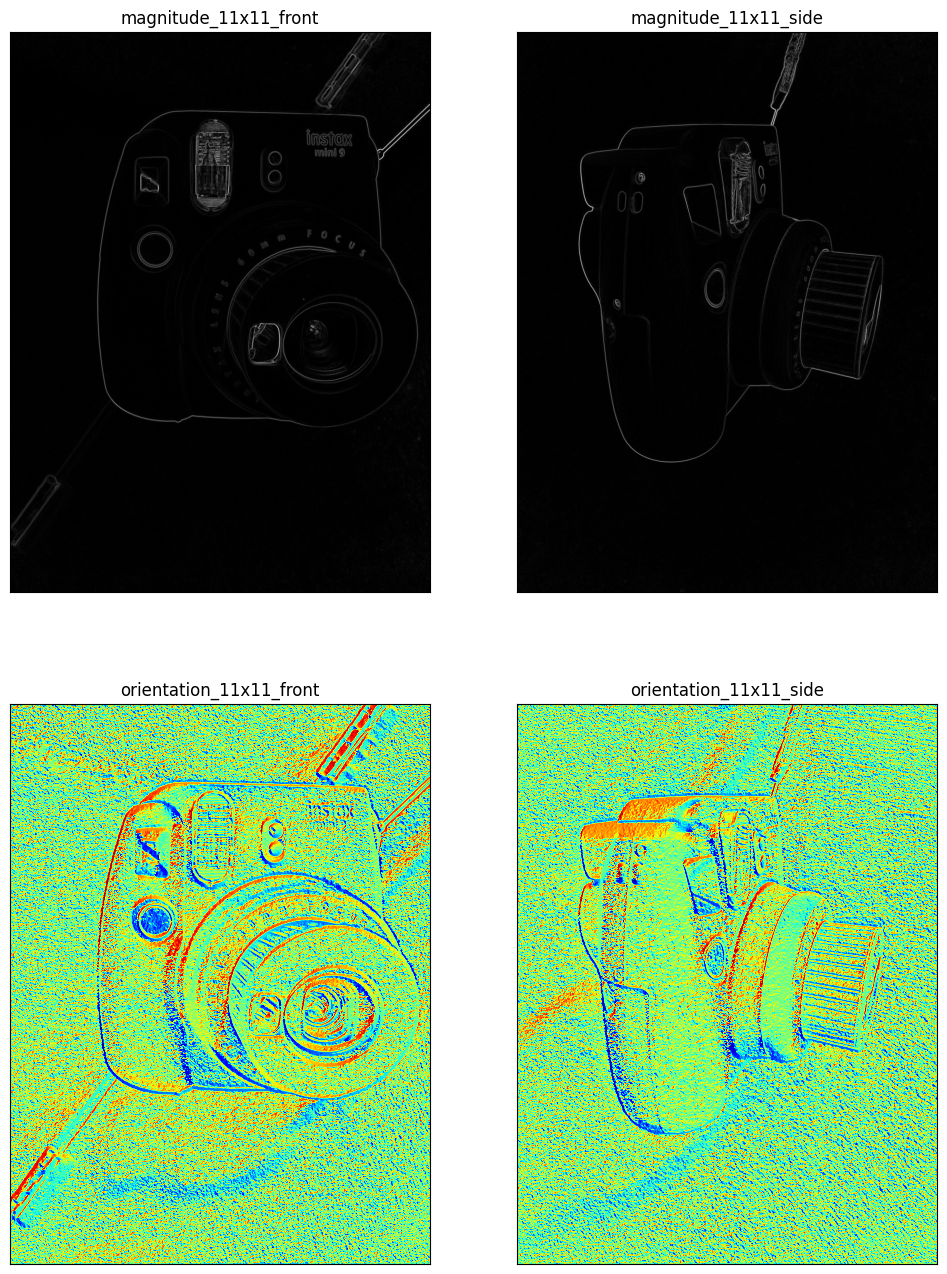

In [7]:
# Computing the gradient magnitude
magnitudeFront = np.sqrt(np.power(imageFilteredFront_x, 2) +np.power(imageFilteredFront_y, 2) )
magnitudeSide = np.sqrt(np.power(imageFilteredSide_x, 2) +np.power(imageFilteredSide_y, 2) )

# Computing the gradient orientation
orientationFront = np.arctan2(imageFilteredFront_y, imageFilteredFront_x)
orientationSide = np.arctan2(imageFilteredSide_y, imageFilteredSide_x)

plt.figure(figsize=(12,16))
plt.subplot(221), plt.imshow(magnitudeFront, cmap='gray')
plt.title("magnitude_11x11_front"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitudeSide, cmap='gray')
plt.title("magnitude_11x11_side"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(orientationFront, cmap='jet')
plt.title("orientation_11x11_front"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(orientationSide, cmap='jet')
plt.title("orientation_11x11_side"), plt.xticks([]), plt.yticks([])
plt.show()

# **5.2. Compute the Edge Magnitude and Orientation (5×5)**

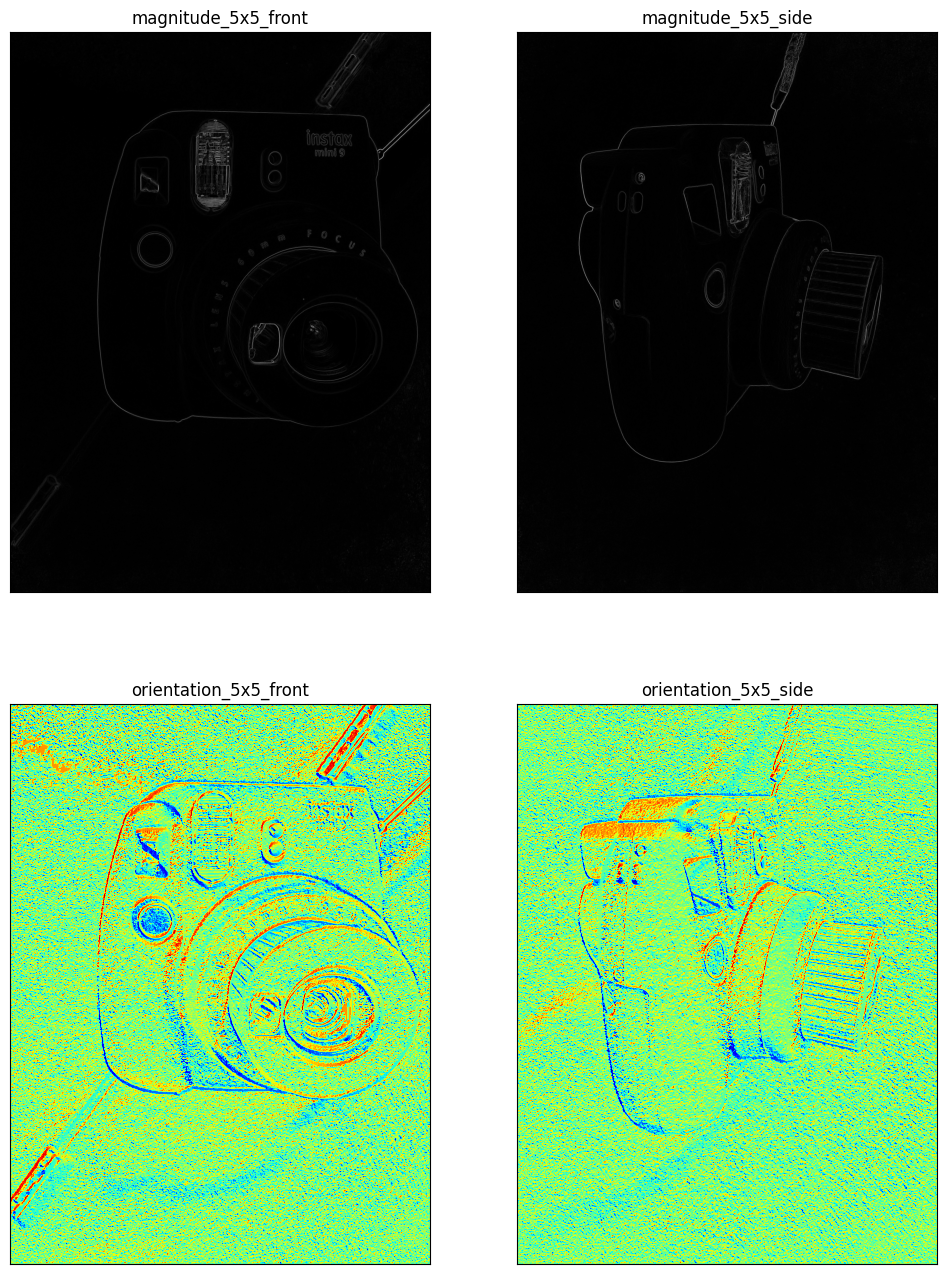

In [8]:
# Computing the gradient magnitude
magnitudeFront_5By5 = np.sqrt(np.power(imageFilteredFront_x_5By5, 2) +np.power(imageFilteredFront_y_5By5, 2) )
magnitudeSide_5By5 = np.sqrt(np.power(imageFilteredSide_x_5By5, 2) +np.power(imageFilteredSide_y_5By5, 2) )

# Computing the gradient orientation
orientationFront_5By5 = np.arctan2(imageFilteredFront_y_5By5, imageFilteredFront_x_5By5)
orientationSide_5By5 = np.arctan2(imageFilteredSide_y_5By5, imageFilteredSide_x_5By5)

plt.figure(figsize=(12,16))
plt.subplot(221), plt.imshow(magnitudeFront_5By5, cmap='gray')
plt.title("magnitude_5x5_front"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitudeSide_5By5, cmap='gray')
plt.title("magnitude_5x5_side"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(orientationFront_5By5, cmap='jet')
plt.title("orientation_5x5_front"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(orientationSide_5By5, cmap='jet')
plt.title("orientation_5x5_side"), plt.xticks([]), plt.yticks([])

plt.show()

****
# **6.1. Canny Edge Detection with opencv (11×11)**

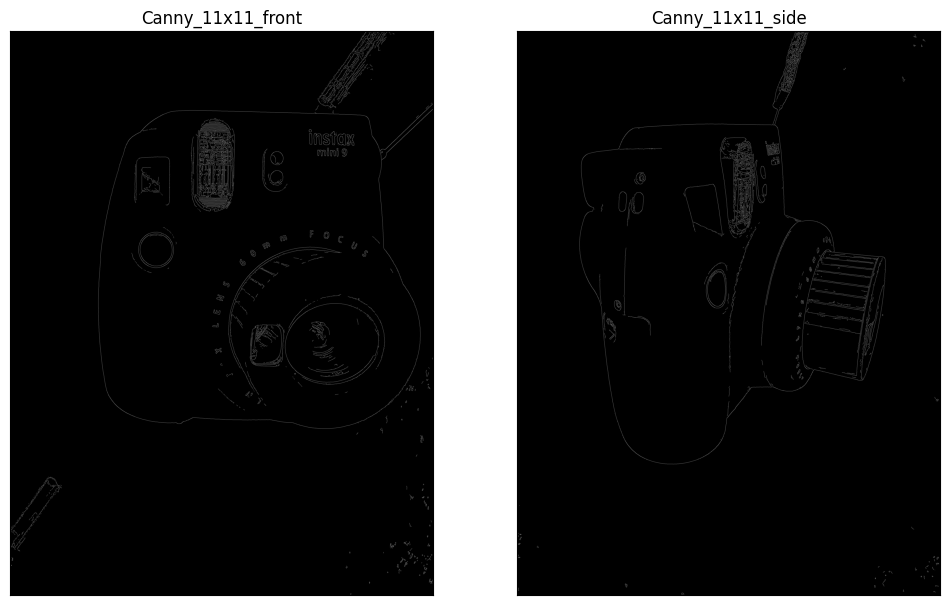

In [9]:
# Converting the pixel values of the image to unsigned 8-bit integers
blurFront_trans = np.uint8(blurFront)
blurSide_trans = np.uint8(blurSide)

# Applying Canny edge to the compatible images
cannyFront = cv2.Canny(blurFront_trans, 0, 30)
cannySide = cv2.Canny(blurSide_trans, 0, 30)

plt.figure(figsize=(12,16))
plt.subplot(121), plt.imshow(cannyFront, cmap='gray')
plt.title("Canny_11x11_front"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cannySide, cmap='gray')
plt.title("Canny_11x11_side"), plt.xticks([]), plt.yticks([])

plt.show()

# **6.2. Canny Edge Detection with opencv (5×5)**

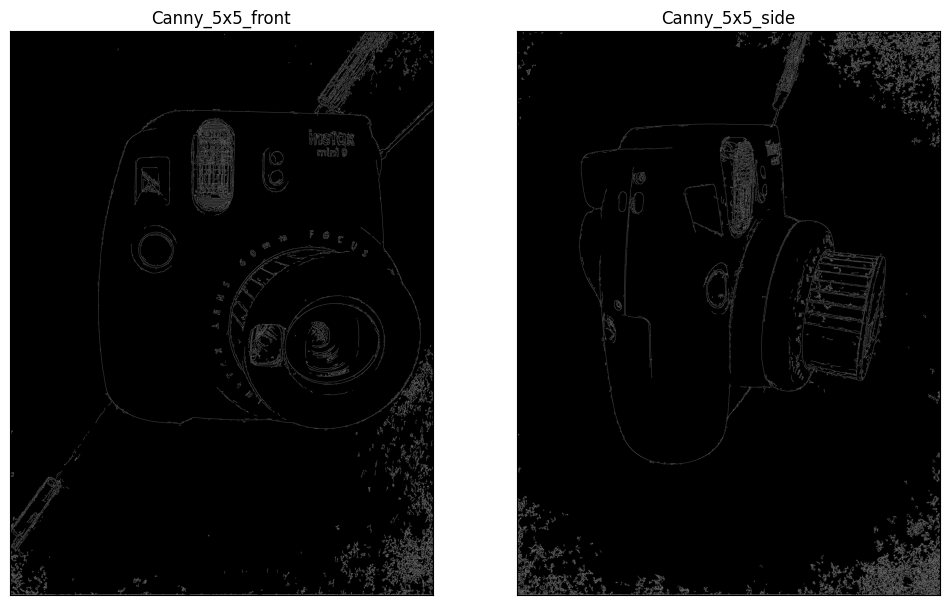

In [10]:
# Converting the pixel values of the image to unsigned 8-bit integers
blurFront_trans_5By5 = np.uint8(blurFront_5By5)
blurSide_trans_5By5 = np.uint8(blurSide_5By5)

# Applying Canny edge to the compatible images
cannyFront_5By5 = cv2.Canny(blurFront_trans_5By5, 0, 30)
cannySide_5By5 = cv2.Canny(blurSide_trans_5By5, 0, 30)

plt.figure(figsize=(12,16))
plt.subplot(121), plt.imshow(cannyFront_5By5, cmap='gray')
plt.title("Canny_5x5_front"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cannySide_5By5, cmap='gray')
plt.title("Canny_5x5_side"), plt.xticks([]), plt.yticks([])
plt.show()